### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load Data

In [4]:
PATH = '../data/merged_data.csv'
merged_data = pd.read_csv(PATH)

### Feature Engineering Step

In [5]:
from scripts.feature_engineering import FeatureEngineering

1) Generate new features

In [6]:
data = FeatureEngineering.add_features(data=merged_data)
data

,GDP,Exchange Rate,index,Price,Pct_Change,7D_MA,30D_MA,7D_Volatility,30D_Volatility,7D_Change,30D_Change
Date,,,,,,,,,,,
1987-01-01,1.748508e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-02,1.749073e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-03,1.749638e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-04,1.750203e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-05,1.750768e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,1.012251e+14,0.949624,9006.0,96.85,-0.030239,96.575714,93.685333,2.394910,2.984813,2.21,10.88
2022-11-09,1.012251e+14,0.949624,9007.0,93.05,-0.039236,96.540000,93.802000,2.453059,2.884312,-0.25,3.50
2022-11-10,1.012251e+14,0.949624,9008.0,94.25,0.012896,96.415714,93.963333,2.556840,2.762986,-0.87,4.84


2) Handle missing values

In [7]:
data = FeatureEngineering.handle_missing_values(data=data)

data.isna().sum()

GDP               0
Exchange Rate     0
index             0
Price             0
Pct_Change        0
7D_MA             0
30D_MA            0
7D_Volatility     0
30D_Volatility    0
7D_Change         0
30D_Change        0
dtype: int64

### Modeling

In [8]:
from scripts.modeling import VAR_MODEL, SARIMAX, LSTM_Model

1) First split the data, I didn't use sklearn's train test split because this is a time series data

In [9]:
# Now you can proceed with your train-validation-test split
train_size = int(len(data) * 0.8)  
validation_size = int(len(data) * 0.1) 

# Define train, validation, and test sets
train = data.iloc[:train_size]
validation = data.iloc[train_size:train_size + validation_size]
test = data.iloc[train_size + validation_size:]

2) Train VAR model, as a baseline model

MSE: 461.9293015009306, RMSE: 21.49254060135587, MAE: 18.715249919362464


d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


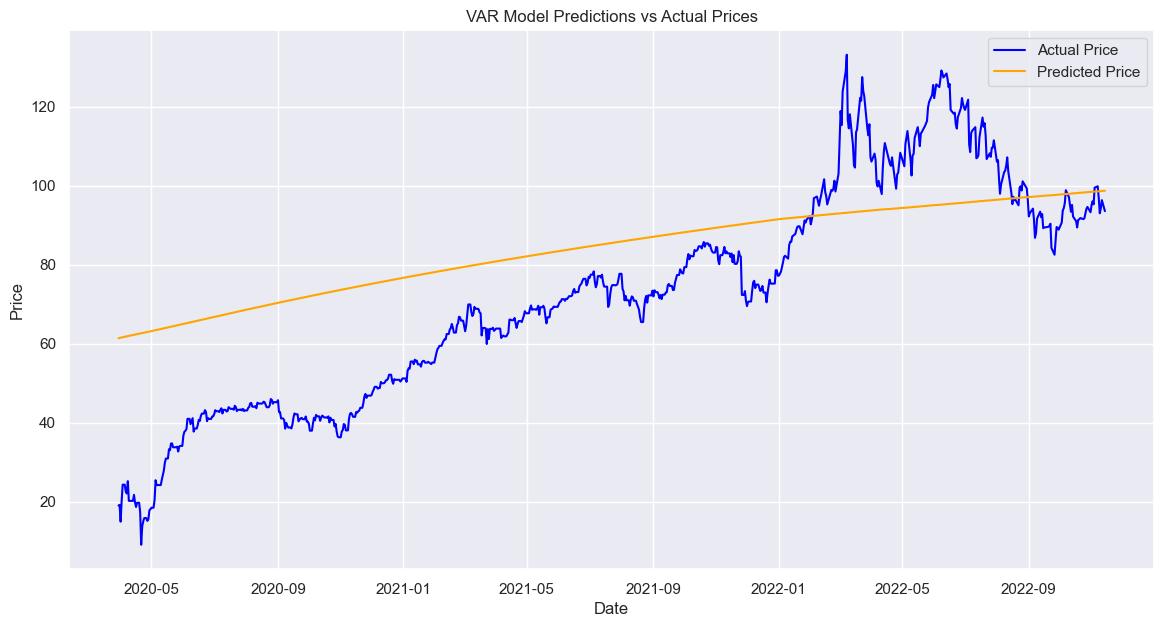

In [10]:
# initialize the model
var_model = VAR_MODEL(train=train, test=test)

#train the model
predictions =var_model.train_model()

2) Train SARIMAX model

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 747.24, RMSE: 27.34, MAE: 25.78


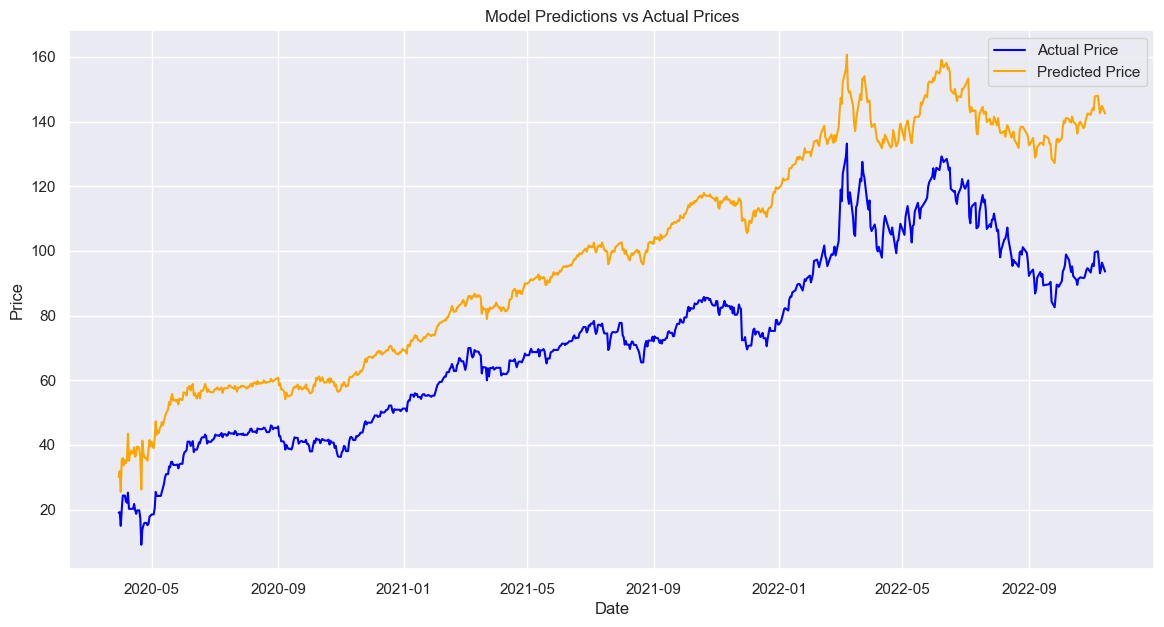

In [11]:
# initialize the model
sarimax_model = SARIMAX(train=train, test=test)

# train the model
predictions = sarimax_model.train_model()

3) Train an LSTM model

In [12]:
# initialze the model
lstm_model = LSTM_Model(train=train, test=test, validation=validation)

# train the model
model, history = lstm_model.train_model()

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0358 - val_loss: 0.0027
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.3775e-04 - val_loss: 0.0023
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.1299e-04 - val_loss: 0.0019
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.3576e-04 - val_loss: 0.0016
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.2180e-04 - val_loss: 0.0013
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9097e-04 - val_loss: 0.0012
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4792e-04 - val_loss: 0.0011
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.3228e-04 - val_loss: 9.6063e-04
Epoch 9/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0135e-04 - val_loss: 8.9307e-04
Epoch 10/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0901e-04 - val_loss: 0.0011
Epoch 11/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9658e-04 - val_loss: 7.3590e-04
